# Predicción de Diabetes

Tenemos una red neuronal que desea determinar si un paciente tiene diabetes o no. Para ello, se tienen como entradas la edad del paciente, el índice de masa corporal (IMC) y el nivel de actividad física. Si queremos agregar más variables como la cantidad de azúcar en sangre, la presión arterial, el historial familiar de diabetes, entre otros, necesitaremos de más neuronas de entrada para poder procesar toda esta información y así determinar con mayor precisión si el paciente tiene diabetes o no.

## Capas de la Red Neuronal

1. **Capa de entrada:** Un vector de 3 elementos representando las variables de entrada.
    - X1 = Edad
    - X2 = Índice de Masa Corporal (IMC)
    - X3 = Nivel de Actividad Física

2. **Capa oculta:** 3 neuronas representando características adicionales del paciente.
    - Y1 = Cantidad de Azúcar en Sangre
    - Y2 = Presión Arterial
    - Y3 = Historial Familiar de Diabetes

3. **Capa de salida:** 2 neuronas representando la clasificación del paciente.
    - S1 = Tiene Diabetes
    - S2 = No Tiene Diabetes

## Conexiones de la Red Neuronal

Las conexiones entre las capas se representan mediante matrices de pesos.

### De la capa de entrada a la capa oculta

$$
\begin{bmatrix}
0.3 & 0.2 & 0.5 \\
0.4 & 0.3 & 0.6 \\
0.5 & 0.4 & 0.7 \\
\end{bmatrix}
$$

### De la capa oculta a la capa de salida

$$
\begin{bmatrix}
0.6 & 0.5 \\
0.7 & 0.6 \\
0.8 & 0.7 \\
\end{bmatrix}
$$

## Calculando los Pesos

Para determinar si un paciente tiene diabetes, necesitamos:
- X1 = 45 años de Edad
- X2 = 28 IMC
- X3 = 3 Nivel de Actividad Física

### Pesos Calculados

Para la clasificación:
- X1 * 0.3 * 45 = 13.5
- X2 * 0.4 * 28 = 11.2
- X3 * 0.5 * 3 = 1.5

Total = 13.5 + 11.2 + 1.5 = 26.2


FloatSlider(value=45.0, description='Edad', step=1.0)

FloatSlider(value=20.5, description='IMC', max=50.0)

FloatSlider(value=3.0, description='Actividad Física', max=10.0, step=1.0)

FloatSlider(value=0.0, description='Azúcar en Sangre', max=200.0, step=1.0)

FloatSlider(value=0.0, description='Presión Arterial', max=200.0, step=1.0)

FloatSlider(value=0.0, description='Historial Familiar', max=1.0, step=1.0)

Button(description='Diagnosticar', style=ButtonStyle())

Valores: Edad=45.0, IMC=20.5, Actividad Física=3.0
Valor entrada=[23.2  16.35 36.9 ], Resultado=[54.885 47.24 ]
El diagnóstico es: Tiene Diabetes
Valores: Edad=45.0, IMC=20.5, Actividad Física=3.0
Valor entrada=[23.2  16.35 36.9 ], Resultado=[54.885 47.24 ]


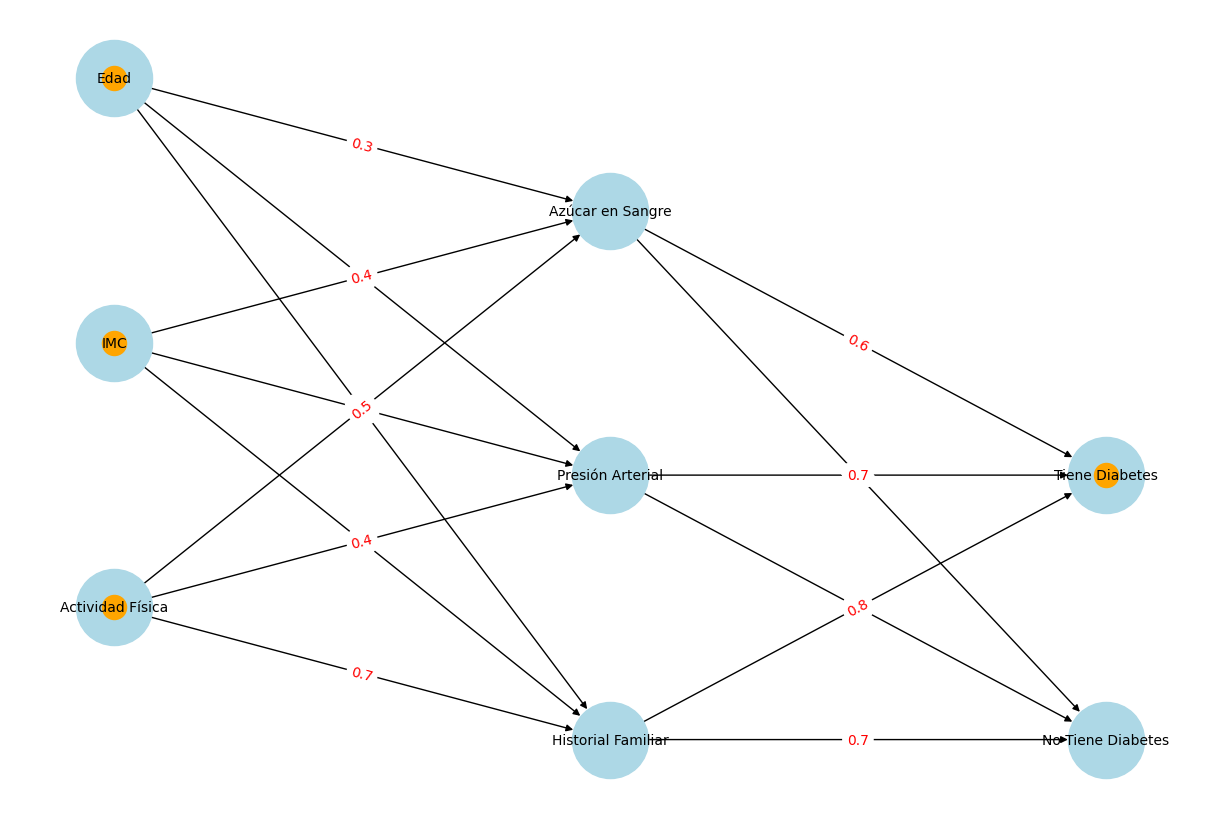

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, clear_output
import ipywidgets as widgets

# Pesos de las características
pesos_entrada = np.array([[0.3, 0.2, 0.5],
                          [0.4, 0.3, 0.6],
                          [0.5, 0.4, 0.7]])
pesos_ocultos = np.array([[0.6, 0.5],
                          [0.7, 0.6],
                          [0.8, 0.7]])

# Función para calcular el resultado de la red neuronal
def calcular_resultado(caracteristicas):
    x = np.array([caracteristicas['edad'], caracteristicas['imc'], caracteristicas['actividad_fisica']])
    valor_entrada = np.dot(x, pesos_entrada)
    resultado = np.dot(valor_entrada, pesos_ocultos)
    print(f"Valores: Edad={caracteristicas['edad']}, IMC={caracteristicas['imc']}, Actividad Física={caracteristicas['actividad_fisica']}")
    print(f"Valor entrada={valor_entrada}, Resultado={resultado}")
    return resultado

# Función para determinar si tiene diabetes
def tiene_diabetes(resultado):
    if resultado[0] > resultado[1]:
        return "Tiene Diabetes"
    else:
        return "No Tiene Diabetes"

# Función para visualizar la red neuronal
def visualizar_red(caracteristicas):
    G = nx.DiGraph()
    edges = [
        ('Edad', 'Azúcar en Sangre', pesos_entrada[0][0]), ('Edad', 'Presión Arterial', pesos_entrada[0][1]), ('Edad', 'Historial Familiar', pesos_entrada[0][2]),
        ('IMC', 'Azúcar en Sangre', pesos_entrada[1][0]), ('IMC', 'Presión Arterial', pesos_entrada[1][1]), ('IMC', 'Historial Familiar', pesos_entrada[1][2]),
        ('Actividad Física', 'Azúcar en Sangre', pesos_entrada[2][0]), ('Actividad Física', 'Presión Arterial', pesos_entrada[2][1]), ('Actividad Física', 'Historial Familiar', pesos_entrada[2][2]),
        ('Azúcar en Sangre', 'Tiene Diabetes', pesos_ocultos[0][0]), ('Azúcar en Sangre', 'No Tiene Diabetes', pesos_ocultos[0][1]),
        ('Presión Arterial', 'Tiene Diabetes', pesos_ocultos[1][0]), ('Presión Arterial', 'No Tiene Diabetes', pesos_ocultos[1][1]),
        ('Historial Familiar', 'Tiene Diabetes', pesos_ocultos[2][0]), ('Historial Familiar', 'No Tiene Diabetes', pesos_ocultos[2][1])
    ]
    G.add_weighted_edges_from(edges)
    pos = {
        'Edad': (0, 3), 'IMC': (0, 2), 'Actividad Física': (0, 1),
        'Azúcar en Sangre': (1, 2.5), 'Presión Arterial': (1, 1.5), 'Historial Familiar': (1, 0.5),
        'Tiene Diabetes': (2, 1.5), 'No Tiene Diabetes': (2, 0.5)
    }

    # Determinar los nodos activados
    activaciones = ['Edad' if caracteristicas['edad'] > 0 else None,
                    'IMC' if caracteristicas['imc'] > 0 else None,
                    'Actividad Física' if caracteristicas['actividad_fisica'] > 0 else None]
    activaciones = list(filter(None, activaciones))

    resultado = calcular_resultado(caracteristicas)
    diagnostico = tiene_diabetes(resultado)
    if diagnostico:
        activaciones.append(diagnostico)

    # Dibujar la red neuronal
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, arrows=True)
    edge_labels = {(u, v): f'{d["weight"]:.1f}' for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    # Resaltar nodos y conexiones activadas
    activated_edges = [(u, v) for u, v, d in G.edges(data=True) if u in activaciones and v in activaciones]
    nx.draw_networkx_edges(G, pos, edgelist=activated_edges, edge_color='orange', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=activaciones, node_color='orange')

    plt.show()

# Interfaz de usuario para cambiar los valores
edad_slider = widgets.FloatSlider(min=0, max=100, step=1, description='Edad', value=45)
imc_slider = widgets.FloatSlider(min=0, max=50, step=0.1, description='IMC', value=28)
actividad_fisica_slider = widgets.FloatSlider(min=0, max=10, step=1, description='Actividad Física', value=3)
azucar_slider = widgets.FloatSlider(min=0, max=200, step=1, description='Azúcar en Sangre', value=110)
presion_slider = widgets.FloatSlider(min=0, max=200, step=1, description='Presión Arterial', value=120)
historial_familiar_slider = widgets.FloatSlider(min=0, max=1, step=1, description='Historial Familiar', value=1)
button = widgets.Button(description='Diagnosticar')

# Función de manejo del botón
def on_button_clicked(b):
    clear_output(wait=True)
    display(edad_slider, imc_slider, actividad_fisica_slider, azucar_slider, presion_slider, historial_familiar_slider, button)
    caracteristicas = {
        "edad": edad_slider.value,
        "imc": imc_slider.value,
        "actividad_fisica": actividad_fisica_slider.value,
        "azucar": azucar_slider.value,
        "presion": presion_slider.value,
        "historial_familiar": historial_familiar_slider.value
    }
    resultado = calcular_resultado(caracteristicas)
    diagnostico = tiene_diabetes(resultado)
    print(f"El diagnóstico es: {diagnostico}")
    visualizar_red(caracteristicas)

button.on_click(on_button_clicked)

# Mostrar la interfaz
display(edad_slider, imc_slider, actividad_fisica_slider, azucar_slider, presion_slider, historial_familiar_slider, button)